In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,5

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# load dataset
df=pd.read_csv('UDEMY_TSA_FINAL-2/Data/uspopulation.csv', parse_dates=True, index_col='DATE')
df.index.freq='MS'

In [5]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


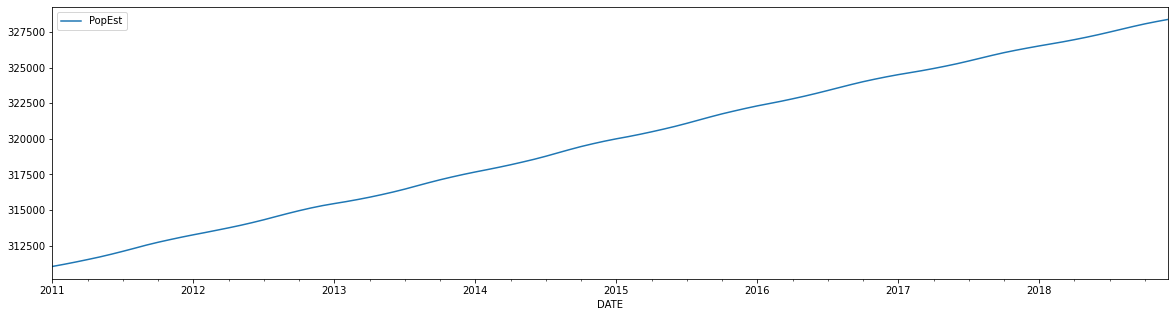

In [7]:
df.plot();

In [9]:
len(df)

96

In [10]:
train=df.iloc[:84]
test=df.iloc[84:]

In [11]:
from statsmodels.tsa.ar_model import AR,ARResults

In [12]:
model=AR(train['PopEst'])

In [20]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1)
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        284.913797
L1.PopEst      0.999686
dtype: float64


In [23]:
# predict

start=len(train)
end=len(train)+len(test)-1
predictions1=AR1fit.predict(start=start, end=end).rename('AR(1) Predictions')

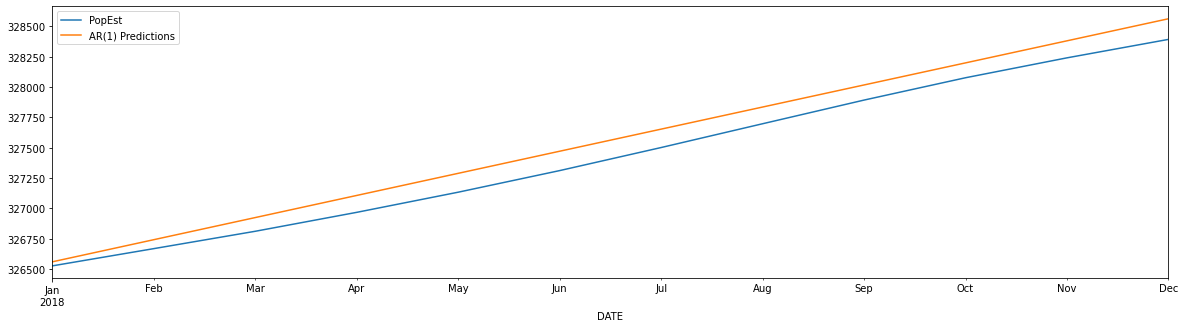

In [24]:
test.plot()
predictions1.plot(legend=True);

In [27]:
# AR2

model = AR(train['PopEst'])
AR2fit=model.fit(maxlag=2)
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [29]:
predictions2=AR2fit.predict(start, end).rename('AR(2) Predictions')

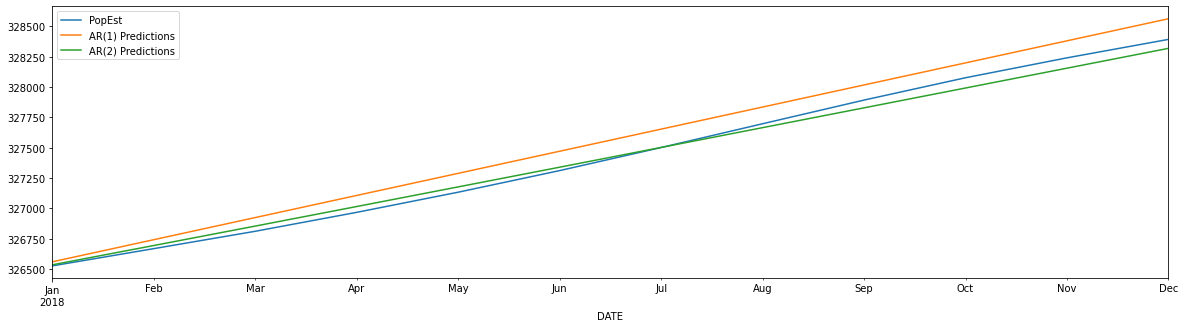

In [30]:
test.plot()
predictions1.plot(legend=True)
predictions2.plot(legend=True);

In [32]:
model = AR(train['PopEst'])
ARfit=model.fit(ic='t-stat')

In [35]:
predictions8=ARfit.predict(start, end).rename('AR(8) Predictions')

In [33]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error

In [36]:
labels=['AR1', 'AR2', 'AR8']

In [37]:
preds=[predictions1, predictions2, predictions8]

In [38]:
for i in range(3):
    error=mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} MSE was: {error}')

AR1 MSE was: 17449.71423207106
AR2 MSE was: 2713.258660776706
AR8 MSE was: 186.97397279687456


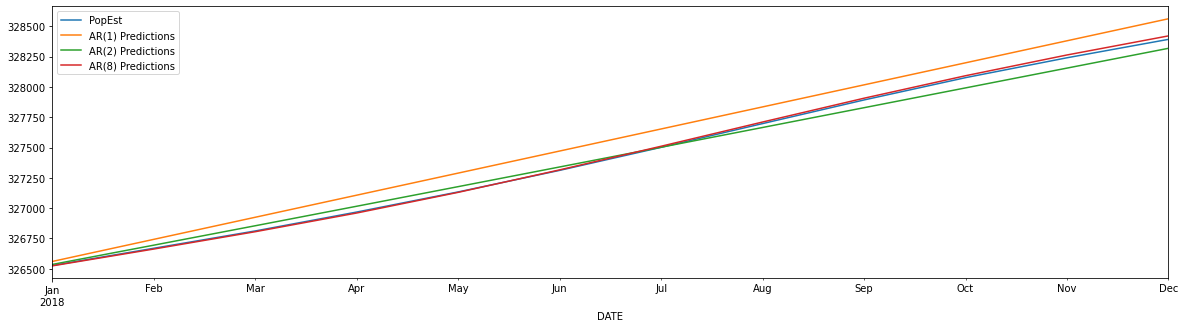

In [40]:
test.plot()
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True);